In [1]:
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import pandas as pd
import seaborn

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets

# Wafer example

In [2]:
wdata = pd.read_csv('waferdata.csv')
wdata.head()

wafer  location  thickness
0      1         1  89.983237
1      1         2  90.081982
2      1         3  89.953110
3      1         4  89.976255
4      2         1  89.941011

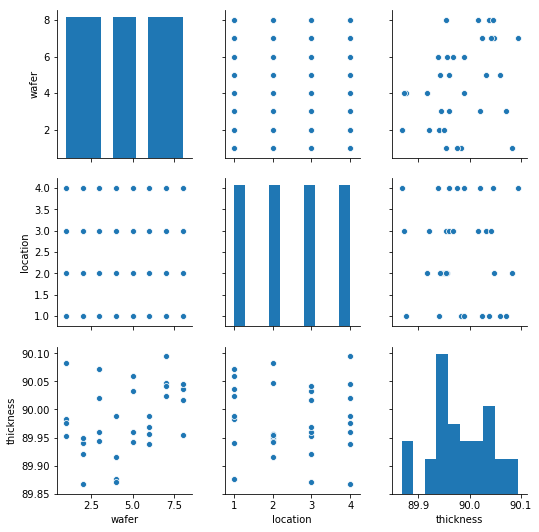

In [3]:
seaborn.pairplot(wdata)

## No effect for location, random effect for wafer

In [4]:
model = smf.mixedlm("thickness ~ 1", wdata, groups=wdata["wafer"]).fit()
model.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: thickness
No. Observations: 32      Method:             REML     
No. Groups:       8       Scale:              0.0022   
Min. group size:  4       Likelihood:         44.4661  
Max. group size:  4       Converged:          Yes      
Mean group size:  4.0                                  
-------------------------------------------------------
           Coef.  Std.Err.    z     P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept  89.982    0.017 5368.084 0.000 89.949 90.015
Group Var   0.002    0.029                             
=======================================================

"""

## Effect for location, no effect for wafer

In [5]:
model = smf.ols("thickness ~ 1 + C(location)", wdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              thickness   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.071
Method:                 Least Squares   F-statistic:                    0.3153
Date:                Thu, 07 May 2020   Prob (F-statistic):              0.814
Time:                        09:57:27   Log-Likelihood:                 45.240
No. Observations:                  32   AIC:                            -82.48
Df Residuals:                      28   BIC:                            -76.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           89.9978      0.022   4045.741      0.000      89.952      90.043
C(location)[T.2]    -0.0239      0.031     -0.759      0.454      -0.088       0.041
C(location)[T.3]    -0.0273      0.031     -0.869      0.392      -0.092       0.037
C(location)[T.4]    -0.0113      0.031     -0.360      0.722      -0.076       0.053
==============================================================================
Omnibus:                        0.175   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.379
Skew:                          -0.092   Prob(JB):                        0.827
Kurtosis:                       2.500   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fixed effect for location, random effect for wafer

In [6]:
model = smf.mixedlm("thickness ~ 1 + C(location)", wdata, groups=wdata["wafer"]).fit()
model.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:              MixedLM   Dependent Variable:   thickness
No. Observations:   32        Method:               REML     
No. Groups:         8         Scale:                0.0023   
Min. group size:    4         Likelihood:           36.4731  
Max. group size:    4         Converged:            Yes      
Mean group size:    4.0                                      
-------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept        89.998    0.022 4045.736 0.000 89.954 90.041
C(location)[T.2] -0.024    0.024   -1.000 0.317 -0.071  0.023
C(location)[T.3] -0.027    0.024   -1.145 0.252 -0.074  0.019
C(location)[T.4] -0.011    0.024   -0.474 0.636 -0.058  0.035
Group Var         0.002    0.029                             
=============================================================

"""

# Interactions

In [7]:
boston_dataset = datasets.load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [8]:
# consider features selected in model selection demo
features = ['RM', 'DIS', 'PTRATIO', 'LSTAT']
X = boston[features]
y = boston_dataset.target

In [9]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     2526.
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        09:57:27   Log-Likelihood:                -1561.2
No. Observations:                 506   AIC:                             3130.
Df Residuals:                     502   BIC:                             3147.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             6.3826      0.232     27.545      0.000       5.927       6.838
DIS           -0.2982      0.124     -2.409      0.016      -0.541      -0.055
PTRATIO       -0.5329      0.093     -5.736      0.000      -0.715      -0.350
LSTAT         -0.5288      0.042    -12.521      0.000      -0.612      -0.446
==============================================================================
Omnibus:                      173.316   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              935.018
Skew:                           1.399   Prob(JB):                    9.19e-204
Kurtosis:                       9.043   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""